<a href="https://colab.research.google.com/github/ibonetc/ML_Doct_MSc/blob/main/ML_Normalizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Escalado y normalización de Rasgos

- El escalado transforma los rasgos a un mismo intervalo. Haciendo que no haya diferencia de rangos entre ellos, lo cual puede facilitar el uso de algorimos de machine learning

### Técnicas de escalado de rasgos
- **Normalization** y **MinMaxScaler**: Normalization convierte los valos entre 0 y 1 y MinMaxScaler entre cualquier rango
```Python
(values - values.min())/(values.max() - values.min())
```
- **Estardarización** (**StandardScaler**)
    - Mean: 0, StdDev: 1
```Python
(values - values.mean())/values.std()
```
    - Menos sensible a outliers

### Algoritmos de Machine Learning
- Algunos algoritmos son más sensibles que otros, como las redes neuronales porque permite que converjan más rápido.

- Los algoritmos basados en distancia tienen maás efecto por el rango de los rasgos. Ejemplo: KNN, SVM

### Ejemplo
- Datos: `data_weather.csv`
- Predecir si va a llover mañana

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/LearnPythonWithRune/DataScienceWithPython/main/jupyter/final/files/weather.csv', index_col=0, parse_dates=True)
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-02-01,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,17.0,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,6.0,Yes
2008-02-02,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,9.0,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,6.6,Yes
2008-02-03,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,17.0,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,18.8,Yes
2008-02-04,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,E,22.0,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,77.4,Yes
2008-02-05,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,W,11.0,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,1.6,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3337 entries, 2008-02-01 to 2017-06-25
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        3334 non-null   float64
 1   MaxTemp        3335 non-null   float64
 2   Rainfall       3331 non-null   float64
 3   Evaporation    3286 non-null   float64
 4   Sunshine       3321 non-null   float64
 5   WindGustDir    2301 non-null   object 
 6   WindGustSpeed  2301 non-null   float64
 7   WindDir9am     3281 non-null   object 
 8   WindDir3pm     3304 non-null   object 
 9   WindSpeed9am   3311 non-null   float64
 10  WindSpeed3pm   3312 non-null   float64
 11  Humidity9am    3323 non-null   float64
 12  Humidity3pm    3324 non-null   float64
 13  Pressure9am    3317 non-null   float64
 14  Pressure3pm    3318 non-null   float64
 15  Cloud9am       2771 non-null   float64
 16  Cloud3pm       2776 non-null   float64
 17  Temp9am        3333 non-null   flo

In [4]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,2301.000000,3311.000000,3312.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000,3337.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,41.761408,15.070674,19.335447,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333,3.319868
std,4.553641,4.494638,9.895172,2.777407,3.810886,13.007523,7.079724,7.482554,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737,9.885066
min,4.300000,11.700000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,0.000000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,31.000000,9.000000,15.000000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000,0.000000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,41.000000,15.000000,19.000000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000,0.000000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,50.000000,20.000000,24.000000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.400000
max,27.600000,45.800000,119.400000,18.400000,13.600000,96.000000,54.000000,57.000000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,119.400000


### Simplificación
- Nos enfocaremos en valores numéricos
- Eliminaremos vacíos

In [5]:
from sklearn.model_selection import train_test_split
import numpy as np

In [13]:
len(data)

3337

In [11]:
data_clean = data.drop(['RISK_MM'], axis=1)
data_clean = data_clean.dropna()

In [12]:
len(data_clean)

1690

Seleccionar los rasgos numéricos

In [14]:
X = data_clean.select_dtypes(include='number')
y = data_clean['RainTomorrow']
y = np.array([0 if value == 'No' else 1 for value in y])

Dividir en entrenamiento y prueba

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

pd.DataFrame(X_train).describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000
mean,14.980399,23.429734,2.851775,5.414571,7.511612,41.677515,14.980030,19.761095,66.477071,52.886095,1018.535873,1016.135281,4.151627,4.093195,18.089053,21.879216
std,4.553343,4.453831,8.176845,2.839351,3.696782,12.521289,6.600499,7.246114,15.161828,15.902517,7.054959,7.048462,2.721996,2.589659,4.951512,4.219905
min,5.000000,11.700000,0.000000,0.000000,0.000000,19.000000,2.000000,2.000000,19.000000,10.000000,996.700000,994.000000,0.000000,0.000000,6.700000,11.000000
25%,11.200000,20.200000,0.000000,3.400000,5.100000,31.000000,11.000000,15.000000,57.000000,43.000000,1013.975000,1011.500000,1.000000,1.000000,14.200000,18.800000
50%,15.000000,23.200000,0.000000,5.000000,8.500000,41.000000,15.000000,20.000000,67.000000,54.000000,1018.600000,1016.300000,4.000000,4.000000,18.400000,21.600000
75%,18.900000,26.400000,1.000000,7.400000,10.300000,50.000000,19.000000,24.000000,78.000000,63.000000,1023.400000,1021.000000,7.000000,7.000000,21.900000,24.800000
max,27.100000,45.800000,94.400000,15.800000,13.600000,91.000000,44.000000,48.000000,100.000000,95.000000,1039.000000,1036.000000,8.000000,8.000000,36.500000,44.700000


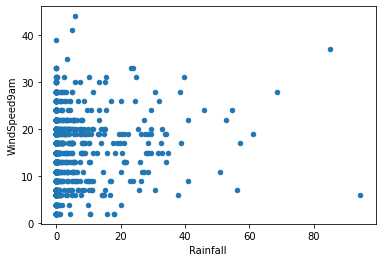

In [16]:
X_train.plot.scatter(x='Rainfall', y='WindSpeed9am')

### Box plots
- Q1: 25%, Q2: 50%, Q3: 75%

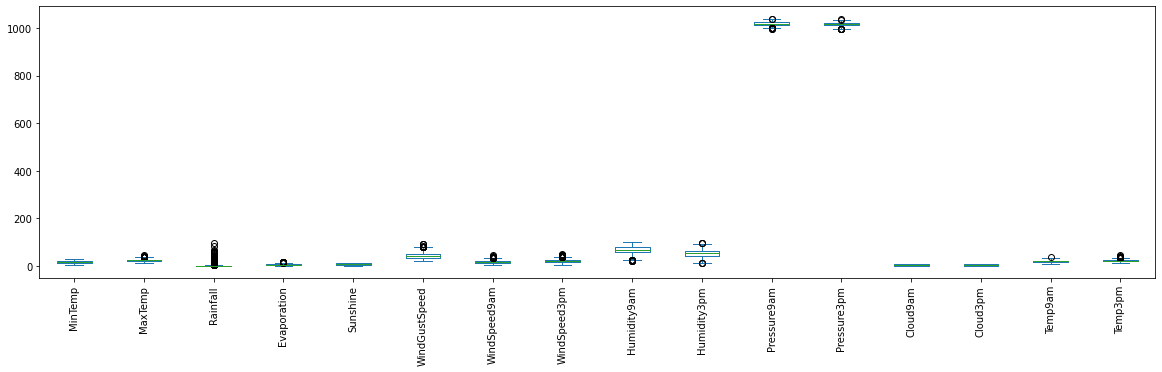

In [17]:
X_train.plot.box(figsize=(20,5), rot=90)

### Normalización
- MinMaxScaler: transforma los rasgos a una escala dada.

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [22]:
pd.DataFrame(X_train_norm).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000
mean,0.451602,0.343980,0.030209,0.342694,0.552324,0.314965,0.309048,0.386111,0.586137,0.504542,0.516214,0.527031,0.518953,0.511649,0.382183,0.322825
std,0.206034,0.130611,0.086619,0.179706,0.271822,0.173907,0.157155,0.157524,0.187183,0.187088,0.166784,0.167821,0.340250,0.323707,0.166158,0.125220
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.280543,0.249267,0.000000,0.215190,0.375000,0.166667,0.214286,0.282609,0.469136,0.388235,0.408392,0.416667,0.125000,0.125000,0.251678,0.231454
50%,0.452489,0.337243,0.000000,0.316456,0.625000,0.305556,0.309524,0.391304,0.592593,0.517647,0.517730,0.530952,0.500000,0.500000,0.392617,0.314540
75%,0.628959,0.431085,0.010593,0.468354,0.757353,0.430556,0.404762,0.478261,0.728395,0.623529,0.631206,0.642857,0.875000,0.875000,0.510067,0.409496
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


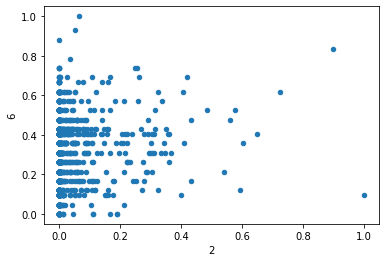

In [23]:
pd.DataFrame(X_train_norm).plot.scatter(x=2, y=6)

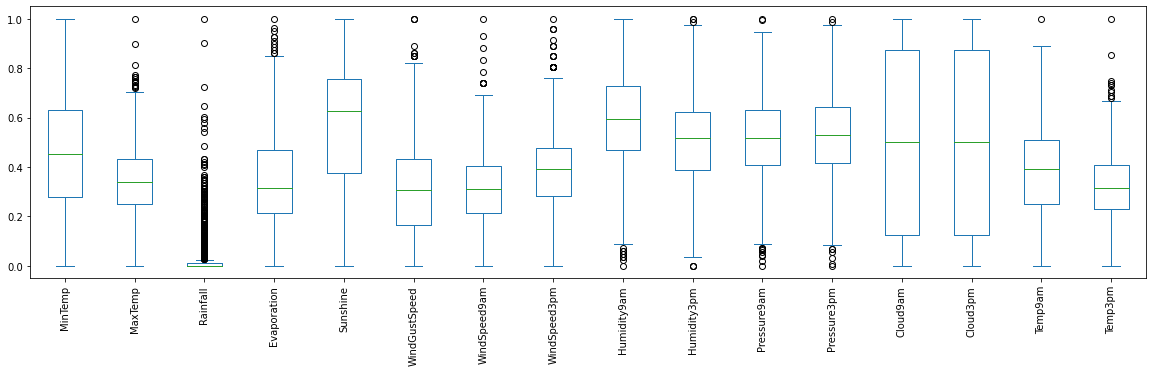

In [24]:
pd.DataFrame(X_train_norm, columns=X_train.columns).plot.box(figsize=(20,5), rot=90)

### Estandarización
- StandardScaler: Estandariza los rasgos a media 0 y una uidad de varaianza.

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scale = StandardScaler().fit(X_train)

X_train_stand = scale.transform(X_train)
X_test_stand = scale.transform(X_test)

In [27]:
pd.DataFrame(X_train_stand).describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,1352.00,1352.00,1352.00,1352.00,1352.00,1352.00,1352.00,1352.00,1352.00,1352.00,1352.00,1352.00,1352.00,1352.00,1352.00,1352.00
mean,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.19,-2.63,-0.35,-1.91,-2.03,-1.81,-1.97,-2.45,-3.13,-2.70,-3.10,-3.14,-1.53,-1.58,-2.30,-2.58
25%,-0.83,-0.73,-0.35,-0.71,-0.65,-0.85,-0.60,-0.66,-0.63,-0.62,-0.65,-0.66,-1.16,-1.19,-0.79,-0.73
50%,0.00,-0.05,-0.35,-0.15,0.27,-0.05,0.00,0.03,0.03,0.07,0.01,0.02,-0.06,-0.04,0.06,-0.07
75%,0.86,0.67,-0.23,0.70,0.75,0.66,0.61,0.59,0.76,0.64,0.69,0.69,1.05,1.12,0.77,0.69
max,2.66,5.02,11.20,3.66,1.65,3.94,4.40,3.90,2.21,2.65,2.90,2.82,1.41,1.51,3.72,5.41


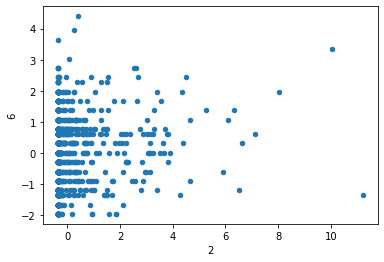

In [28]:
pd.DataFrame(X_train_stand).plot.scatter(x=2, y=6)

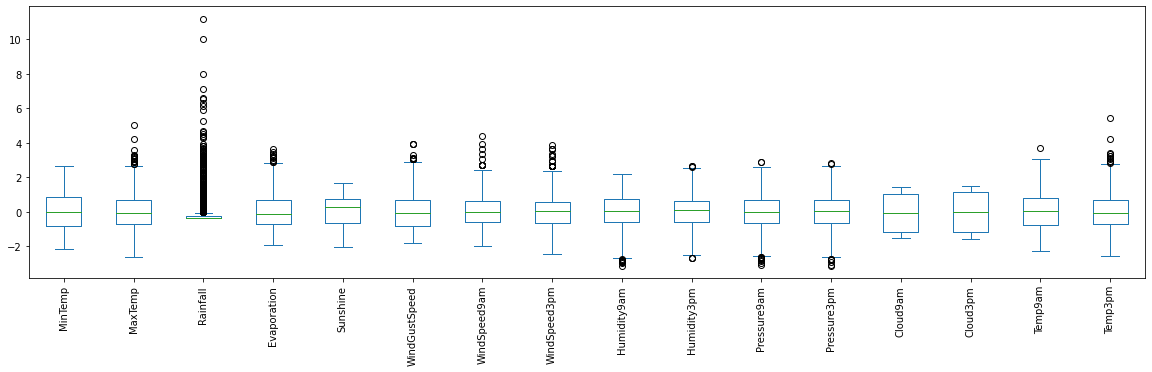

In [29]:
pd.DataFrame(X_train_stand, columns=X_train.columns).plot.box(figsize=(20,5), rot=90)

### Utilizando SVM para probar la normalización y estarización

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


score = []

trainX = [X_train, X_train_norm, X_train_stand]
testX = [X_test, X_test_norm, X_test_stand]

for train, test in zip(trainX, testX):
    svc = SVC()
    
    svc.fit(train, y_train)
    y_pred = svc.predict(test)

    score.append(accuracy_score(y_test, y_pred))

df_svr = pd.DataFrame({'Accuracy': score}, index=['Original', 'Normalizado', 'Estandarizado'])
df_svr

,Accuracy
Original,0.718935
Normalizado,0.807692
Estandarizado,0.813609
